![title](processo-ecommerce-750x410.jpg)

# Análise de dados produzidos pelo e-commerce no ano de 2015 

In [243]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
%matplotlib inline

In [195]:
# Lendo a planilha
sales = pd.read_csv('ecommerce.csv',sep=',',low_memory=False)

# Configurando o tamanho das imagens plotadas
sns.set(rc={'figure.figsize':(12,10)})

# Setando as configurações de visualização do df

In [196]:
# Setando a visualização das colunas do df
pd.set_option("display.max_columns",None)

# Visualizando o dataframe

In [197]:
sales.tail()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
51285,FA-2015-30771,1/21/15,1/27/15,6.0,Standard Class,Fashion,Sports Wear,$85.00,5,0.04,$17.00,$1.70,Medium,IN-0040977,Welch Fein,Corporate,Pasadena,Texas,United States,Central,Jan
51286,FA-2015-30772,6/22/15,6/24/15,2.0,Standard Class,Fashion,Sports Wear,$85.00,1,0.03,$2.50,$0.20,Medium,TT-0040978,Martinez Arnett,Corporate,Harare,Harare,Zimbabwe,Africa,Jun
51287,FA-2015-30773,1/1/15,1/7/15,6.0,Standard Class,Fashion,Sports Wear,$85.00,1,0.05,$0.80,$0.10,Medium,ON-0040979,Mccoy Duston,Home Office,Townsville,Queensland,Australia,Oceania,Jan
51288,FA-2015-30774,12/7/15,12/14/15,7.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.04,$28.30,$2.80,Medium,RN-0040980,Bentley Zypern,Consumer,Houston,Texas,United States,Central,Dec
51289,FA-2015-30775,12/1/15,12/6/15,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,$28.30,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Dec


# Tratando os dados

In [198]:
# Retirando os valores nulos
sales.dropna(subset=['Order Date','Order Priority'],inplace=True)

In [199]:
# Retirando colunas que não são úteis
sales.drop(columns=['Order ID','Customer ID'],inplace=True)

# Renomeando as colunas
sales.rename(columns={'Months':'Months_Order'},inplace=True)

In [200]:
# Substituindo os valores que estão errados
sales.replace(to_replace=['So3th','4orth','Casula Shoes','xxx'],value=['South','North','Casual Shoes','0.00'],inplace=True)

In [201]:
# Eliminando valores fora do padrão no preço e quantidade
sales = sales.loc[(sales['Sales'] != "0.xf") & (sales['Quantity'] != 'abc')]

In [202]:
# Construindo a lista de países para corrigir a variável Region
South_America = ['Argentina', 'Bolivia', 'Brazil',' Chile', 'Colombia', 'Ecuador',' Guiana', 'Paraguay', 'Peru', 'Suriname',' Uruguay', 'Venezuela']
Asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Burma', 'Cambodia', 'China', 
        'East Timor',' Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 
        'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',' Malaysia', 'Mongolia',' Nepal', 
        'North Korea', 'Oman', 'Pakistan', 'Papua New Guinea',' Philippines', 'Qatar',
       ' Saudi Arabia',' Singapore', 'South Korea', 'Sri Lanka', 'Syria',' Taiwan', 'Tajikistan', 'Thailand','Turkey', 
        'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam',' Yemen','Myanmar (Burma)']
North_America = ['United States','Canada','Mexico','Greenland']
Central_America = ['El Salvador', 'Costa Rica', 'Belize',' Guatemala', 'Honduras', 'Nicaragua',' Panama']
Oceania = ['Australia', 'Micronesia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Nauru', 'New Zealand', 'Palau','Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu','Vanuatu']
Europe = ['Germany','Russia','Bosnia and Herzegovina','United Kingdom','France','Italy','Spain','Ukraine','Poland'
          ,'Romania','Netherlands','Belgium','Czech Republic','Greece','Portugal','Sweden','Hungary',
          'Belarus','Austria','Serbia','Switzerland','Bulgaria','Denmark','Finland','Slovakia','Norway','Ireland',
          'Croatia','Moldova','Albania','Lithuania','North Macedonia','Slovenia','Latvia','Estonia','Montenegro','Macedonia',
          'Luxembourg','Malta','Iceland','Andorra','Monaco','Liechtenstein','San Marino','Holy See']
Africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cabo Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'the Democratic Republic of Congo', 
          'Cote d’Ivoire',' Djibouti', 'Equatorial Guinea', 'Egypt', 'Eritrea',' Ethiopia, Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 
          'the Kingdom of Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',' Mauritius', 'Morocco',' Mozambique', 'Namibia', 'Niger', 'Nigeria', 
          'Rwanda', 'Saharawi Arab Democratic Republic', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',' Sudan', 'Kingdom of Swaziland', 
          'Tanzania', 'Togo',' Tunisia', 'Uganda', 'Zambia','Zimbabwe']

In [203]:
# Construindo a função para organizar a região de acordo com seus países correspondentes
def countries(x):
    for c in South_America:
        if x == c.strip():
            return "America do Sul"
        else :
            x
    for c in Asia:
        if x == c.strip():
            return "Asia"
        else :
            x
    for c in North_America:
        if x == c.strip():
            return "America do Norte"
        else :
            x
    for c in Central_America:
        if x == c.strip():
            return "America Central"
        else :
            x
    for c in Oceania:
        if x == c.strip():
            return "Oceania"
        else :
            x
    for c in Africa:
        if x == c.strip():
            return "Africa"
        else :
            x
    for c in Europe:
        if x == c.strip():
            return "Europa"
        else :
            x
            
#Aplicando a função            
sales['Region_teste'] = sales['Country'].apply(lambda x: countries(x))
# Preenchendo os espaçoes vazios com os valores da antiga coluna de Region
sales['Region_teste'].fillna(sales['Region'],inplace=True)
# Retirando a coluna antiga da Região
sales.drop(columns=['Region'],inplace=True)
# Renomeando a coluna Region_teste
sales.rename(columns={'Region_teste':'Region'},inplace=True)

In [204]:
# Construindo a função que retorna o dia
def dia(x):
    return str(x).split('-')[2][:2]

# Aplicando a função para extrair as informações de dia correspondentes ao Ship Date e Order Date
sales['Order_Day'] = pd.to_datetime(sales['Order Date'],errors='coerce').apply(lambda x: dia(x))
sales['Ship_Day'] = pd.to_datetime(sales['Ship Date'],errors='coerce').apply(lambda x: dia(x))

In [205]:
# Atribuindo uma coluna de valor sem a presença do $
def preco(x):
    return x.split("$")[1]

def preco_custo(x):
    if len(str(x)) >= 6:
        return x.split("$")[1]
    else:
        np.nan

# Aplicando a função
sales['Preço($)'] = sales['Sales'].apply(lambda x: preco(x))
sales['Lucro($)'] = sales['Profit'].apply(lambda x: preco(x))
sales['Frete($)'] = sales['Shipping Cost'].apply(lambda x: preco_custo(x))

# Retirando a coluna sales,profit e shipping cost
sales.drop(columns=['Sales','Profit','Shipping Cost'],errors='coerce',inplace=True)

In [206]:
# Realizando os ajustes na coluna do Aging
data_ordem = pd.to_datetime(sales['Order Date'],errors='coerce')
data_ship = pd.to_datetime(sales['Ship Date'],errors='coerce')

# Adicionando a coluna
sales['Aging_New'] = abs((data_ordem - data_ship))

# Escolhendo apenas o valor do dia
def aging(x):
    return str(x).split(' ')[0]

# Aplicando a função
sales['Aging_New'] = sales['Aging_New'].apply(lambda x: aging(x))

# retirando a coluna de Aging antiga
sales.drop(columns=['Aging'],inplace=True)

# Renomeando a coluna do Aging_New
sales.rename(columns={'Aging_New':'Aging'},inplace=True)

In [207]:
# Realizando a inserção da coluna do mês referente ao Ship Date
def mes_frete(x): 
    data = str(x).split('-')[1]
    if  data == '01':
        return 'Jan'
    elif data == '02':
        return 'Feb'
    elif data == '03':
        return 'Mar'
    elif data == '04':
        return 'Apr'
    elif data == '05':
        return 'May'
    elif data == '06':
        return 'Jun'
    elif data == '07':
        return 'Jul'
    elif data == '08':
        return 'Aug'
    elif data == '09':
        return 'Sep'
    elif data == '10':
        return 'Oct'
    elif data == '11':
        return 'Nov'
    elif data == '12':
        return 'Dec'
    
# Aplicando a função
sales['Months_Ship'] = pd.to_datetime(sales['Ship Date'],errors='coerce').apply(lambda x: mes_frete(x))

In [208]:
# Substituindo a variável nula nas colunas de quantity e agin pela mediana dos valores
a = sales['Aging'].apply(lambda x: int(x) if x != np.nan else np.nan)
b = sales['Quantity'].apply(lambda x: float(x) if x != np.nan else np.nan)

sales['Aging'].replace(np.nan,a.median(),inplace=True)
sales['Quantity'].replace(np.nan,b.median(),inplace=True)

In [209]:
# Preenchendo os valores nulos restantes com o vazio
sales.fillna('',inplace=True)

In [210]:
# Mudando o tipo do valor das colunas
sales['Quantity'] = sales['Quantity'].astype('int32')
sales['Discount'] = pd.to_numeric(sales['Discount'],errors='coerce')
sales['Preço($)'] = pd.to_numeric(sales['Preço($)'],errors='coerce')
sales['Frete($)'] = pd.to_numeric(sales['Frete($)'],errors='coerce')
sales['Lucro($)'] = pd.to_numeric(sales['Lucro($)'],errors='coerce')
sales['Order_Day'] = sales['Order_Day'].astype('int32')
sales['Ship_Day'] = sales['Ship_Day'].astype('int32')
sales['Aging'] = sales['Aging'].astype('int32')

In [211]:
# Trocando a posição das colunas
sales = sales[['Order_Day','Months_Order','Ship_Day','Months_Ship','Ship Mode','Product Category','Product','Segment','Order Priority',
              'Customer Name','Region','Country','City','State','Quantity','Discount','Preço($)','Frete($)','Lucro($)','Aging']]

In [212]:
# Visualizando como os dados estão contruidos
for column in sales:
    unique_vals = np.unique(sales[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Order_Day :31
The number of values for feature Months_Order :12
The number of values for feature Ship_Day :31
The number of values for feature Months_Ship :12
The number of values for feature Ship Mode :5 -- ['45788' 'First Class' 'Same Day' 'Second Class' 'Standard Class']
The number of values for feature Product Category :4 -- ['Auto & Accessories' 'Electronic' 'Fashion' 'Home & Furniture']
The number of values for feature Product :42
The number of values for feature Segment :4 -- ['' 'Consumer' 'Corporate' 'Home Office']
The number of values for feature Order Priority :4 -- ['Critical' 'High' 'Low' 'Medium']
The number of values for feature Customer Name :795
The number of values for feature Region :8 -- ['Africa' 'America Central' 'America do Norte' 'America do Sul' 'Asia'
 'Caribbean' 'Europa' 'Oceania']
The number of values for feature Country :147
The number of values for feature City :3636
The number of values for feature State :1094
The number 

In [213]:
# Visualizando o dataframe tratado
sales.tail()

,Order_Day,Months_Order,Ship_Day,Months_Ship,Ship Mode,Product Category,Product,Segment,Order Priority,Customer Name,Region,Country,City,State,Quantity,Discount,Preço($),Frete($),Lucro($),Aging
51285,21,Jan,27,Jan,Standard Class,Fashion,Sports Wear,Corporate,Medium,Welch Fein,America do Norte,United States,Pasadena,Texas,5,0.04,85.0,1.7,17.0,6
51286,22,Jun,24,Jun,Standard Class,Fashion,Sports Wear,Corporate,Medium,Martinez Arnett,Africa,Zimbabwe,Harare,Harare,1,0.03,85.0,0.2,2.5,2
51287,1,Jan,7,Jan,Standard Class,Fashion,Sports Wear,Home Office,Medium,Mccoy Duston,Oceania,Australia,Townsville,Queensland,1,0.05,85.0,0.1,0.8,6
51288,7,Dec,14,Dec,Standard Class,Fashion,Sports Wear,Consumer,Medium,Bentley Zypern,America do Norte,United States,Houston,Texas,3,0.04,85.0,2.8,28.3,7
51289,1,Dec,6,Dec,Standard Class,Fashion,Sports Wear,Home Office,Medium,Mcclure Schwarz,America do Sul,Brazil,Valinhos,São Paulo,3,0.03,85.0,2.8,28.3,5


In [214]:
sales.groupby('Segment')['Segment'].count()

Segment
                   1
Consumer       26513
Corporate      15429
Home Office     9342
Name: Segment, dtype: int64

# Visualização das Tasks e dos Gráficos

## Produtos

1 - Quais são os 10 produtos que apresentam maior soma de preço ?

In [215]:
prod = pd.DataFrame(sales.groupby('Product')['Preço($)'].sum().sort_values(ascending=False).head(10)).reset_index()
prod

,Product,Preço($)
0,T - Shirts,692912.0
1,Titak watch,637260.0
2,Running Shoes,626080.0
3,Jeans,609092.0
4,Formal Shoes,595335.0
5,Shirts,547624.0
6,Fossil Watch,444564.0
7,Casual Shoes,340990.0
8,Suits,304655.0
9,Sports Wear,240295.0


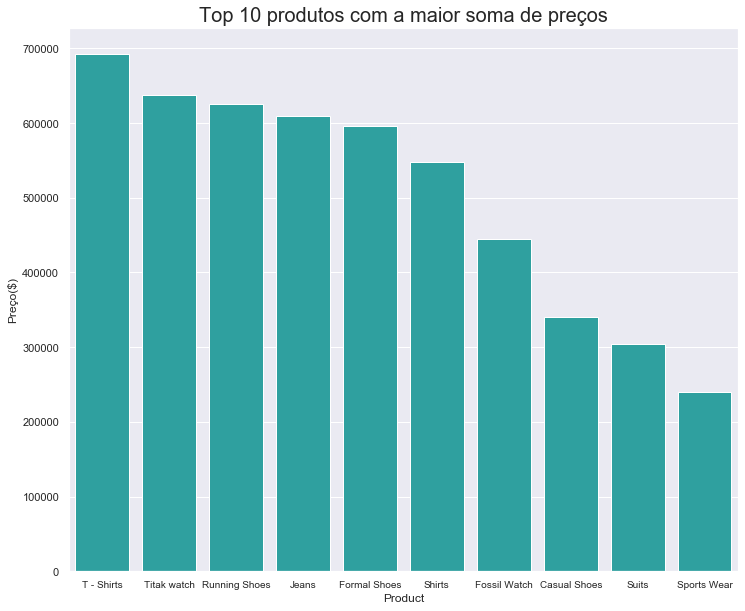

In [216]:
ax = sns.barplot(x="Product", y="Preço($)", data=prod,color="#1CB3B1")
plt.xticks(size=10)
plt.title("Top 10 produtos com a maior soma de preços",fontsize=20)
plt.show()

2 - Quais são os 10 produtos que apresentam maior soma de desconto nos preços? E, qual sua relação com o aging?

In [217]:
desc = pd.DataFrame(sales.groupby('Product')['Discount','Aging'].agg({'Discount':'sum','Aging':'mean'}).head(10).sort_values(by=['Discount'],ascending=False)).reset_index()
desc

,Product,Discount,Aging
0,Bed Sheets,31.32,5.460117
1,Beds,30.88,5.459670
2,Car Mat,25.75,5.590303
3,Bike Tyres,25.30,5.463680
4,Car Pillow & Neck Rest,24.87,5.602657
5,Car Body Covers,24.78,5.549637
6,Car Seat Covers,24.47,5.434099
7,Car & Bike Care,24.47,5.682809
8,Car Media Players,23.61,5.587167
9,Apple Laptop,6.41,0.000000


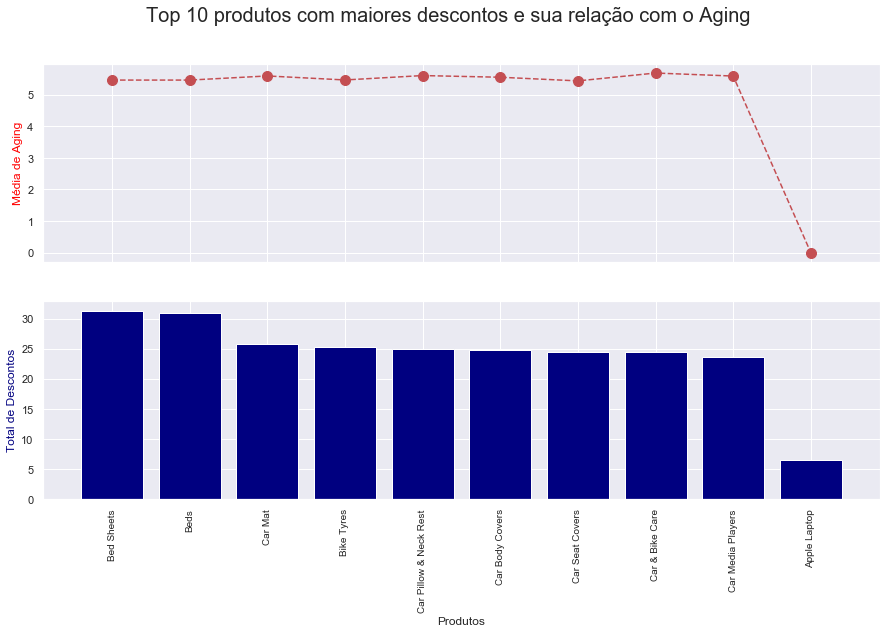

In [218]:
fig, ax1 = plt.subplots(2,figsize=(15,8),sharex=True)

produtos = [product for product in desc['Product'].values]


ax1[0].plot(produtos,desc['Aging'],'r--',marker='o',markersize=10)
fig.suptitle('Top 10 produtos com maiores descontos e sua relação com o Aging',fontsize=20)
ax1[1].bar(produtos,desc['Discount'],color='navy')
ax1[1].set_xticklabels(produtos,rotation='vertical',size=10)
ax1[1].set_xlabel('Produtos')
ax1[1].set_ylabel('Total de Descontos', color='navy')
ax1[0].set_ylabel('Média de Aging', color='red')
plt.show()

3 - Quais são os 10 produtos que apresentam maior soma de lucro?

In [219]:
prof = pd.DataFrame(sales.groupby('Product')['Lucro($)'].sum().head(10).sort_values(ascending=False)).reset_index()
prof

,Product,Lucro($)
0,Bed Sheets,114973.1
1,Car Pillow & Neck Rest,107735.8
2,Car Media Players,39989.6
3,Beds,35752.6
4,Apple Laptop,33025.0
5,Bike Tyres,26803.2
6,Car & Bike Care,22700.3
7,Car Body Covers,21629.9
8,Car Mat,20782.8
9,Car Seat Covers,20006.9


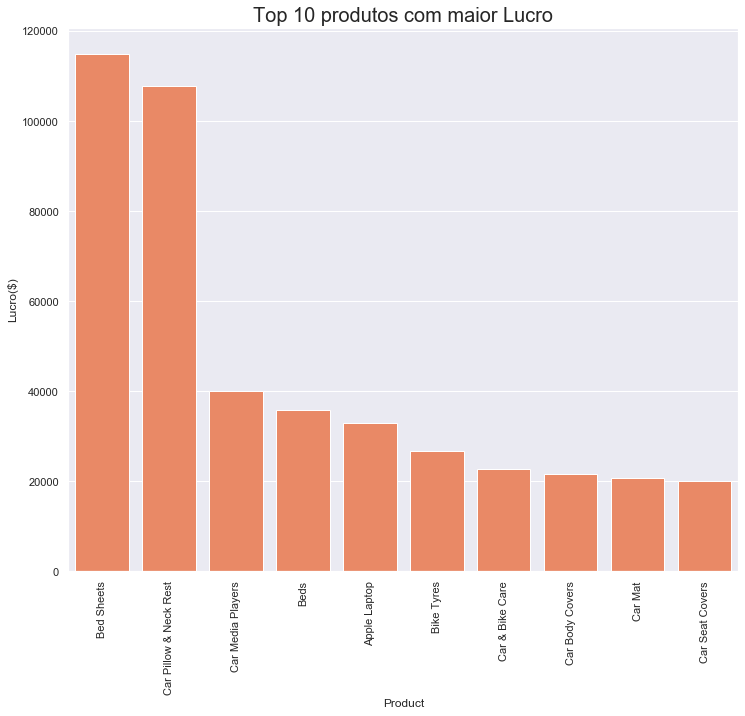

In [220]:
ax = sns.barplot(x="Product", y="Lucro($)", data=prof,color='coral')
plt.title("Top 10 produtos com maior Lucro",fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

4 - Quais são os produtos vendidos acima de 500 quantidades de acordo com o tipo de segmento ?

In [221]:
seg = sales.groupby(['Product','Segment'])['Quantity'].sum().sort_values(ascending=False).reset_index()
seg = seg.loc[seg['Quantity'] >=500]
seg

,Product,Segment,Quantity
0,Casual Shoes,Consumer,4506
1,Sports Wear,Consumer,4463
2,Suits,Consumer,4437
3,Fossil Watch,Consumer,4429
4,Formal Shoes,Consumer,4422
...,...,...,...
76,Sofa Covers,Home Office,559
77,Towels,Home Office,557
78,Umbrellas,Home Office,557
79,Bed Sheets,Home Office,526


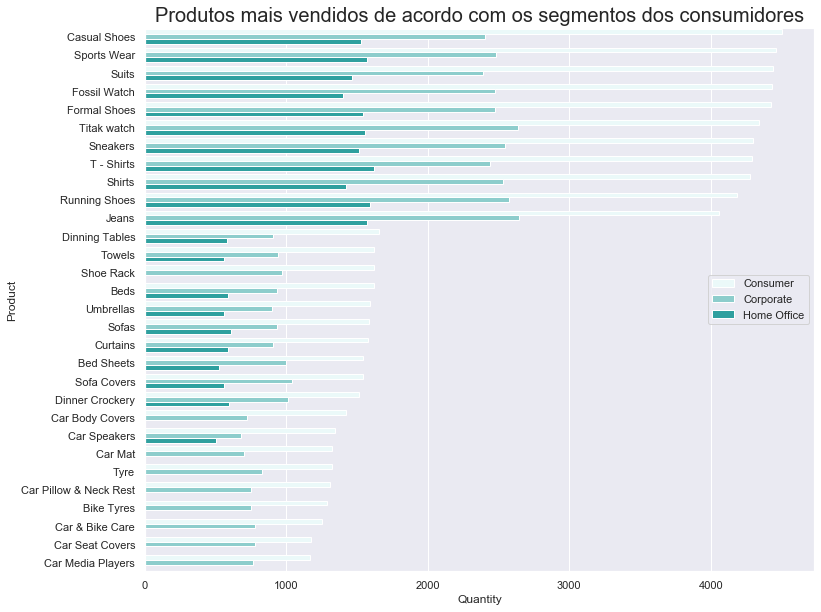

In [222]:
ax = sns.barplot(x="Quantity",y="Product", data=seg, ci=False,orient = 'h', hue = 'Segment',color='#1CB3B1')
plt.legend(loc='best')
plt.title("Produtos mais vendidos de acordo com os segmentos dos consumidores",fontsize=20)
plt.show()

## Lucro

1 - Qual é a média da distribuição do lucro ?

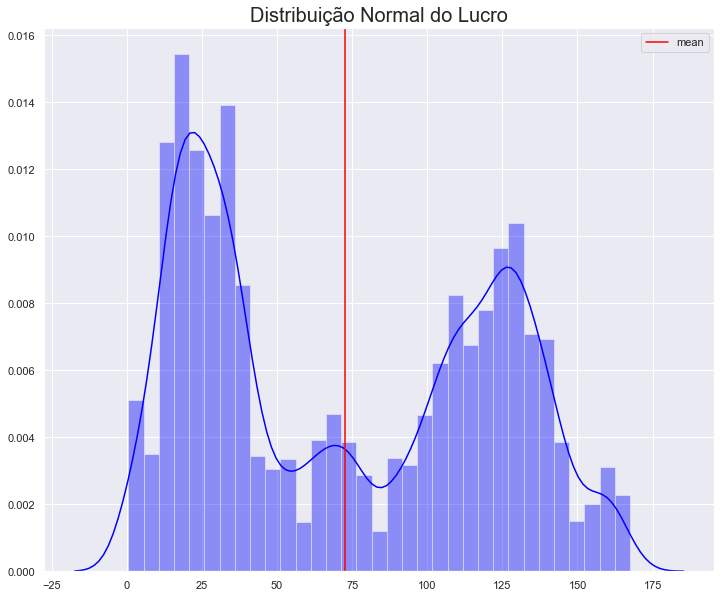

In [223]:
x = sales['Lucro($)'].values

mean = sales['Lucro($)'].mean()

sns.distplot(x, color = 'blue');
plt.axvline(mean, 0,1, color = 'red',label='mean');
plt.legend()
plt.title("Distribuição Normal do Lucro",loc='center',fontsize=20)
plt.show()

## Preço

1 - Qual é a média da distribuição do preço ?

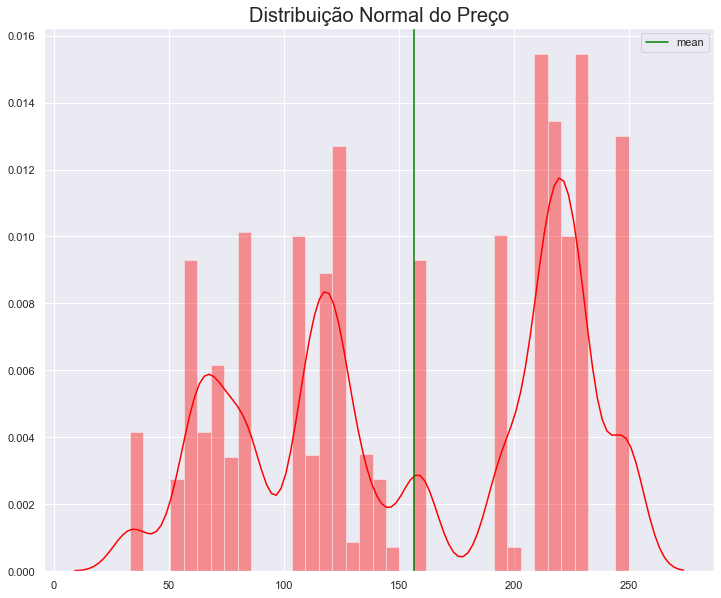

In [224]:
x = sales['Preço($)'].values

mean = sales['Preço($)'].mean()

sns.distplot(x, color = 'red');
#plt.hist(x,color='blue')
plt.axvline(mean, 0,1, color = 'green',label='mean');
plt.title("Distribuição Normal do Preço",loc='center',fontsize=20)
plt.legend()
plt.show()

2 - Qual a média de preços de acordo com suas ordens de prioridade?

In [225]:
sales.groupby('Order Priority')['Preço($)'].mean()

Order Priority
Critical    138.493001
High        151.528099
Low         169.556106
Medium      160.321646
Name: Preço($), dtype: float64

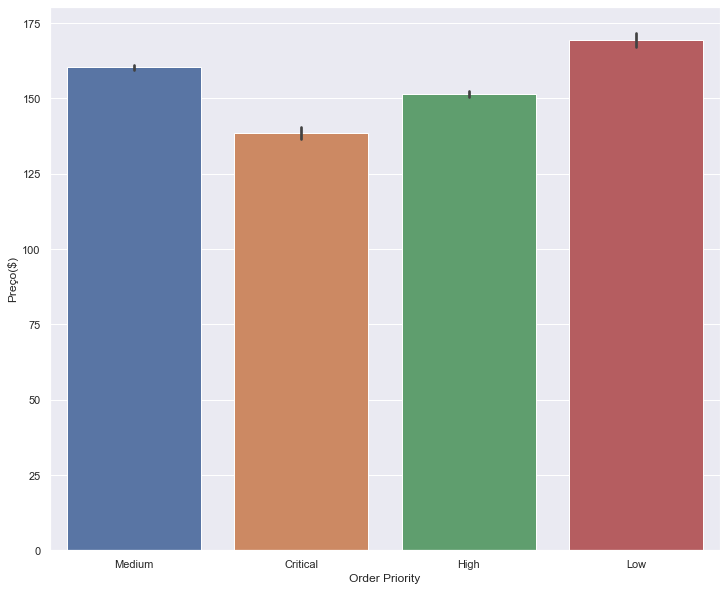

In [226]:
ax = sns.barplot(x="Order Priority", y="Preço($)",data=sales)

## Dias da ordem de pedido e envio

1 - Qual é o dia que apresenta maior quantidade de ordem de pedido? Qual é o dia que apresenta maior quantidade de ordem de despacho?

In [33]:
# Agrupando de acordo com o dia da ordem de pedido
day_order = pd.DataFrame(sales.groupby(['Order_Day'])['Quantity'].sum().sort_values(ascending=False)).reset_index()

# Agrupando de acordo com o dia de despacho
ship_day = pd.DataFrame(sales.groupby('Ship_Day')['Quantity'].sum().sort_values(ascending=False)).reset_index()

# Printando as respectivas respostas
print(f'O dia {day_order.loc[0][0]} contém a maior quantidade de ordem de pedidos com {day_order.loc[0][1]} pedidos')
print(f'O dia {ship_day.loc[0][0]}  contém a maior quantidade de envio dos pedidos com {ship_day.loc[0][1]} envios')

O dia 25 contém a maior quantidade de ordem de pedidos com 5257 pedidos
O dia 14  contém a maior quantidade de envio dos pedidos com 5262 envios


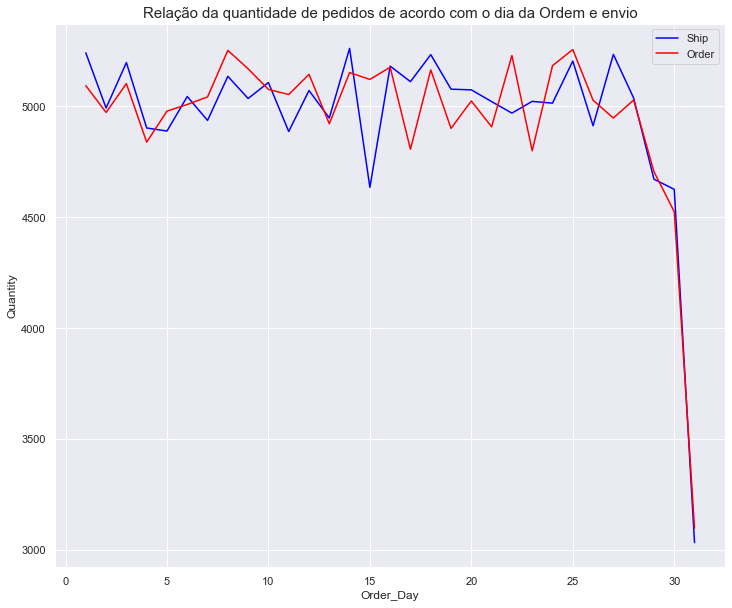

In [34]:
ax = sns.lineplot(y='Quantity',x='Ship_Day',data=ship_day,color='blue',label='Ship')
ax = sns.lineplot(y='Quantity',x='Order_Day',data=day_order,color='red',label='Order')
a = ship_day['Ship_Day'].max()
b = day_order['Order_Day'].max()
plt.title("Relação da quantidade de pedidos de acordo com o dia da Ordem e envio",fontsize=15)
plt.legend()
plt.show()

## Mês

1 - Qual é o mês da ordem de pedidos que apresenta maior preço de vendas ? E, qual sua relação com o lucro?

In [46]:
# Agrupando os dados de acordo com mês
quant_mes = pd.DataFrame(sales.groupby('Months_Order')['Preço($)','Lucro($)'].sum().sort_values(by=['Preço($)'],ascending=False)).reset_index()

#Realizando o pint da resposta
print(f'O mês com maior soma de preços é {quant_mes.loc[0][0]} apresentando {quant_mes.loc[0][1]} ($) no total')

O mês com maior soma de preços é Dec apresentando 693073.0 ($) no total


2 - Qual é o mês de envio dos pedidos que apresenta maior preço de vendas ? E, qual sua relação com o lucro?

In [59]:
# Agrupando os dados de acordo com mês
frete_mes = pd.DataFrame(sales.groupby('Months_Ship')['Preço($)','Lucro($)'].sum().sort_values(by=['Preço($)'],ascending=False)).reset_index()

#Realizando o pint da resposta
print(f'O mês com maior soma de preços é {frete_mes.loc[0][0]} apresentando {frete_mes.loc[0][1]} ($) no total')

O mês com maior soma de preços é Oct apresentando 700245.0 ($) no total


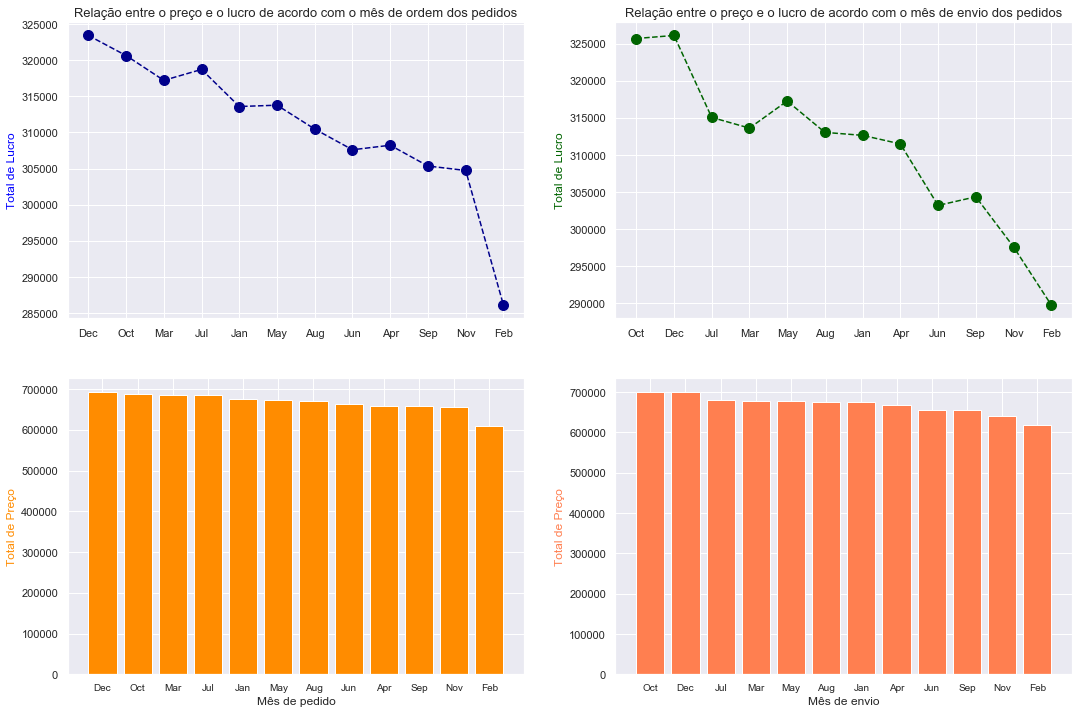

In [89]:
# Gráfico mostrando a relação entre os meses de pedido e envio de acordo com seus preços e lucros
fig, ax1 = plt.subplots(2,2,figsize=(18,12))

# Meses do ano de acordo com o pedido
mes = [mes for mes in quant_mes['Months_Order'].values]

ax1[0,0].plot(mes,quant_mes['Lucro($)'],linestyle='--',marker='o',color='darkblue',markersize=10)
ax1[1,0].bar(mes,quant_mes['Preço($)'],color='darkorange')
ax1[1,0].set_xticklabels(mes,size=10)
ax1[1,0].set_xlabel('Mês de pedido')
ax1[1,0].set_ylabel('Total de Preço', color='darkorange')
ax1[0,0].set_ylabel('Total de Lucro', color='blue')
ax1[0,0].set_title('Relação entre o preço e o lucro de acordo com o mês de ordem dos pedidos',fontsize=13,loc='center')

# Meses do ano de acordo com o envio
meses = [mes for mes in frete_mes['Months_Ship'].values]

ax1[0,1].plot(meses,frete_mes['Lucro($)'],linestyle = '--',marker='o',color='darkgreen',markersize=10)
ax1[1,1].bar(meses,frete_mes['Preço($)'],color='coral')
ax1[1,1].set_xticklabels(meses,size=10)
ax1[1,1].set_xlabel('Mês de envio')
ax1[1,1].set_ylabel('Total de Preço', color='coral')
ax1[0,1].set_ylabel('Total de Lucro', color='darkgreen')
ax1[0,1].set_title('Relação entre o preço e o lucro de acordo com o mês de envio dos pedidos',fontsize=13,loc='center')

plt.show()

## Estado

1 - Quais são os 15 estados que apresentam maior lucro?

In [39]:
est = pd.DataFrame(sales.groupby('State')['Lucro($)'].sum().sort_values(ascending=False).head(15)).reset_index()
est

,State,Lucro($)
0,California,142905.2
1,England,109275.5
2,New York,80855.4
3,Texas,72492.1
4,Ile-de-France,70627.9
5,New South Wales,56253.6
6,Queensland,52913.3
7,North Rhine-Westphalia,50167.2
8,San Salvador,45997.0
9,National Capital,43966.6


## Categoria de Produtos

1 - Qual é a categoria de produto com maior quantidade vendida?

In [40]:
cat = pd.DataFrame(sales.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)).reset_index()

# Realizando o print da resposta
print(f'A categoria de produto com maior quantidade vendida é {cat.loc[0][0]} com {cat.loc[0][1]}')

# Visualizando o agrupamento
cat

A categoria de produto com maior quantidade vendida é Fashion com 92071


,Product Category,Quantity
0,Fashion,92071
1,Home & Furniture,31055
2,Auto & Accessories,22386
3,Electronic,8211


## País

1 - Quais são os 15 países que apresentam maior custo de frete? E, qual sua relação com o Aging?

In [92]:
df_pais = pd.DataFrame(sales.groupby('Country')['Frete($)','Aging'].sum().sort_values(by=['Frete($)'],ascending=False).head(15)).reset_index()
df_pais

,Country,Frete($),Aging
0,United States,72480.6,52137
1,Australia,20545.2,14789
2,France,20358.1,14510
3,Mexico,19411.2,13537
4,Germany,14995.5,10785
5,China,13677.4,9697
6,United Kingdom,11863.4,8480
7,Brazil,11534.9,8315
8,India,11454.0,8307
9,Indonesia,10536.7,7264


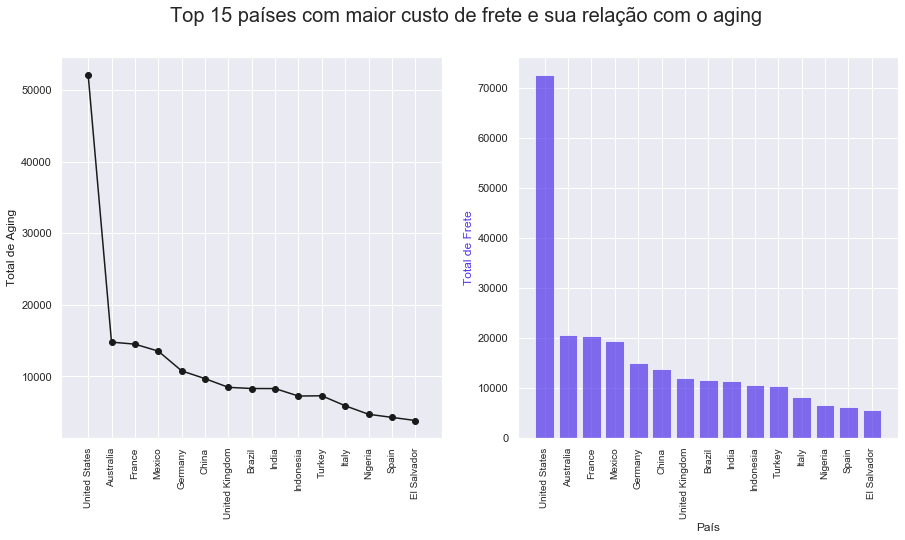

In [111]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7),sharex=True)

pais = [pais for pais in df_pais['Country'].values]

ax1[0].plot(pais,df_pais['Aging'],'k-o')
ax1[0].set_ylabel('Total de Aging', color='k')
ax1[0].set_xticklabels(pais,rotation='vertical',size=10)
ax1[1].bar(pais,df_pais['Frete($)'],color='#5133EC',alpha=0.7)
ax1[1].set_xticklabels(pais,rotation='vertical',size=10)
fig.suptitle("Top 15 países com maior custo de frete e sua relação com o aging",fontsize=20)
ax1[1].set_xlabel('País')
ax1[1].set_ylabel('Total de Frete', color='#5133EC')


plt.show()

3 - Qual país da América do Sul apresenta maior soma de desconto ?

In [115]:
# Selecionando os países da América do sul 
am_sul = sales.loc[sales['Region'] == "America do Sul"]

In [116]:
# Agrupando os dados de acordo com o país e o desconto
desc_sul = pd.DataFrame(am_sul.groupby('Country')['Discount'].sum().sort_values(ascending=False)).reset_index()
print(f"O país com a maior soma de descontos é o {desc_sul.loc[0][0]} com um total de {desc_sul.loc[0][1]:.2f}")

O país com a maior soma de descontos é o Brazil com um total de 47.90


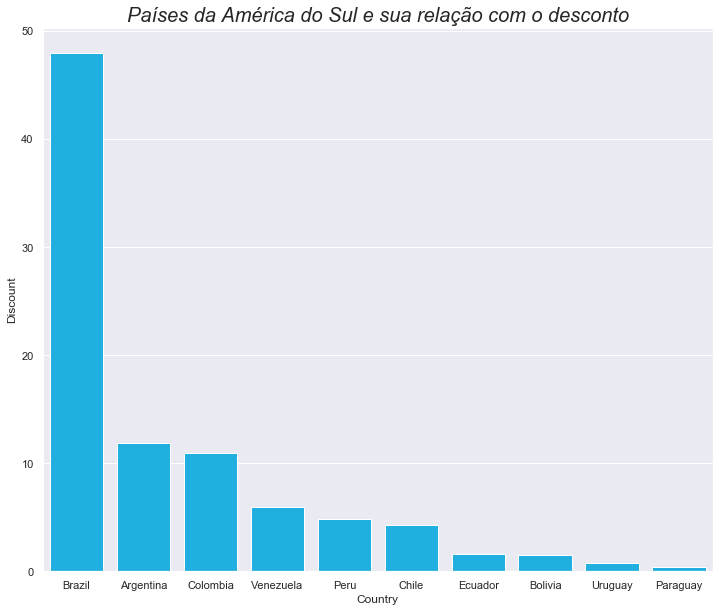

In [117]:
sns.barplot(x='Country',y='Discount',data=desc_sul,color='deepskyblue')
plt.title("Países da América do Sul e sua relação com o desconto",fontsize=20,style='italic')
plt.show()

4 - No Brasil, quais são os 15 produtos mais vendidos?

In [118]:
# Selecionando apenas o país do Brasil
br = am_sul.loc[am_sul['Country'] == 'Brazil']

# Agrupando os dados de acordo com a quantidade de produtos
br_prod = pd.DataFrame(br.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(15)).reset_index()
br_prod

,Product,Quantity
0,Sports Wear,306
1,T - Shirts,293
2,Fossil Watch,283
3,Suits,279
4,Sneakers,274
5,Titak watch,271
6,Formal Shoes,255
7,Shirts,251
8,Running Shoes,236
9,Casual Shoes,233


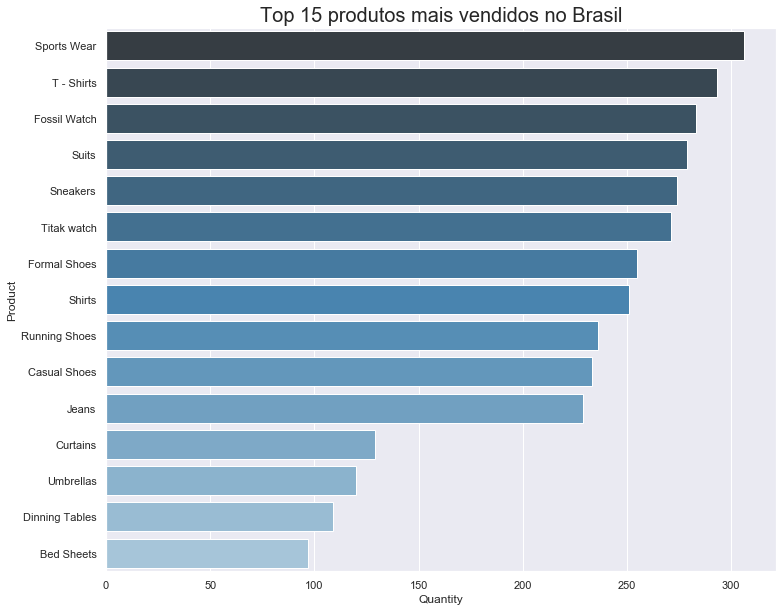

In [130]:
sns.barplot(y='Product',x='Quantity',orient='h',data=br_prod,palette="Blues_d")
plt.title("Top 15 produtos mais vendidos no Brasil",fontsize=20,loc='center')
plt.show()

5 - No Brasil, quais são os 30 estados que apresentam maior média de preços?

In [132]:
est_prod = pd.DataFrame(br.groupby('State')['Preço($)'].mean().sort_values(ascending=False).head(30)).reset_index()
est_prod.head()

,State,Preço($)
0,Sergipe,179.666667
1,Mato Grosso do Sul,177.500000
2,Acre,176.833333
3,Amapá,175.250000
4,Rio Grande do Norte,170.111111


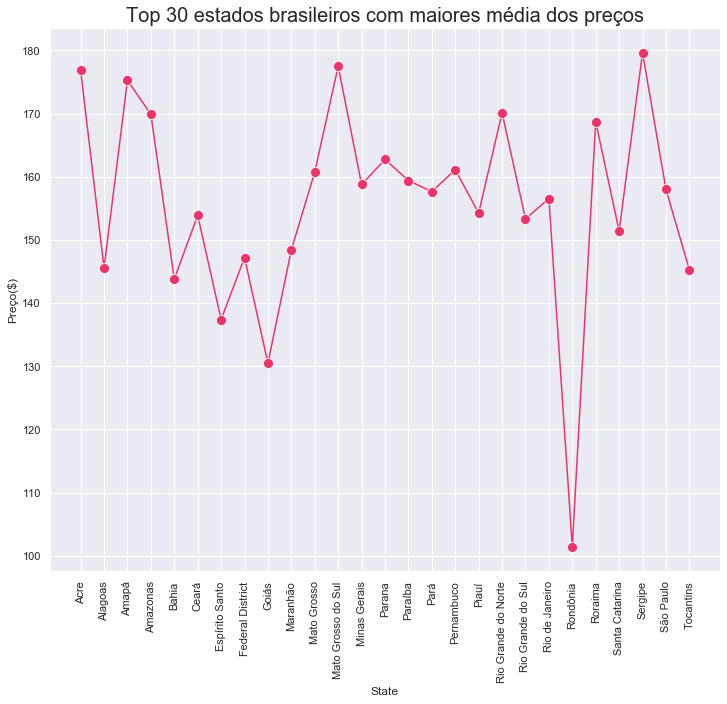

In [138]:
sns.lineplot(x='State',y='Preço($)',data=est_prod,color='#EC336B',linestyle='--',marker='o',markersize=10)
plt.title("Top 30 estados brasileiros com maiores média dos preços",loc='center',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

6 - No Brasil , quais são as 10 cidades que apresentam maior soma de aging?

In [51]:
ag_br = pd.DataFrame(br.groupby('City')['Aging'].sum().sort_values(ascending=False).head(10)).reset_index()
ag_br

,City,Aging
0,São Paulo,786
1,Salvador,223
2,Brasília,199
3,Curitiba,157
4,Presidente Dutra,155
5,Manaus,148
6,Indaial,130
7,Bom Jesus da Lapa,130
8,São Miguel dos Campos,128
9,Recife,112


7 - No Brasil, quais são as 10 cidades que apresentam menor aging ?

In [52]:
ag_br_menos = pd.DataFrame(br.groupby('City')['Aging'].sum().sort_values(ascending=True).head(10)).reset_index()
ag_br_menos

,City,Aging
0,Itapeva,0
1,Farroupilha,0
2,Dourados,0
3,Vilhena,0
4,Mococa,0
5,Itapevi,0
6,Toledo,0
7,Lençóis Paulista,0
8,Arapongas,1
9,Rondonópolis,1


## Customer name

1 - Quais são os 20 consumidores que apresentam maior média de gasto de acordo com seu segmento ?

In [53]:
# Descobrindo se existem nomes duplicados
a = sales.duplicated(subset=['Customer Name']).sum()
print(f'Existem {a} nomes de consumidores duplicados')

Existem 50492 nomes de consumidores duplicados


In [54]:
# Exemplo de nome que se repete no dataframe
sales.loc[sales['Customer Name'] == "Abbott Mackendrick"].head(10)

,Order_Day,Months_Order,Ship_Day,Months_Ship,Ship Mode,Product Category,Product,Segment,Order Priority,Customer Name,Region,Country,City,State,Quantity,Discount,Preço($),Frete($),Lucro($),Aging
850,16,Mar,19,Mar,First Class,Auto & Accessories,Tyre,Corporate,Critical,Abbott Mackendrick,Africa,Egypt,Alexandria,Al Iskandariyah,3,0.01,250.0,16.3,162.5,3
886,31,Oct,9,Nov,First Class,Auto & Accessories,Tyre,Corporate,High,Abbott Mackendrick,Africa,Egypt,Alexandria,Al Iskandariyah,2,0.02,250.0,16.0,160.0,9
2534,5,Dec,13,Dec,First Class,Auto & Accessories,Bike Tyres,Corporate,Critical,Abbott Mackendrick,America do Norte,Canada,Calgary,Alberta,1,0.04,72.0,7.2,72.0,8
3060,16,Jul,25,Jul,First Class,Auto & Accessories,Car Media Players,Corporate,High,Abbott Mackendrick,Caribbean,Dominican Republic,La Romana,La Romana,3,0.05,140.0,3.9,39.0,9
3174,6,Apr,8,Apr,First Class,Auto & Accessories,Car Mat,Corporate,Critical,Abbott Mackendrick,America do Norte,Canada,Calgary,Alberta,2,0.04,54.0,2.7,27.0,2
4317,25,May,1,Jun,First Class,Auto & Accessories,Car Mat,Corporate,Critical,Abbott Mackendrick,Africa,Egypt,Alexandria,Al Iskandariyah,5,0.03,54.0,1.1,10.8,7
5171,30,Jun,10,Jul,First Class,Auto & Accessories,Tyre,Corporate,High,Abbott Mackendrick,Africa,Egypt,Alexandria,Al Iskandariyah,2,0.05,250.0,14.5,145.0,10
5385,18,Jul,28,Jul,First Class,Auto & Accessories,Car Body Covers,Corporate,High,Abbott Mackendrick,America do Norte,United States,Providence,Rhode Island,3,0.05,117.0,1.9,19.5,10
5510,17,Jan,22,Jan,First Class,Auto & Accessories,Car Speakers,Corporate,High,Abbott Mackendrick,Africa,Egypt,Alexandria,Al Iskandariyah,3,0.05,211.0,9.9,99.4,5
5685,23,Jul,2,Aug,First Class,Auto & Accessories,Bike Tyres,Corporate,Medium,Abbott Mackendrick,America do Sul,Colombia,Cartagena,Bolívar,3,0.03,72.0,2.4,24.0,10


In [55]:
# Agrupando os nomes de acordo com seus segmentos e descobrindo quais apresentam maior média de gasto
df_name = pd.DataFrame(sales.groupby(['Customer Name','Segment'])['Preço($)'].mean()).reset_index()
df_name.head(20)

,Customer Name,Segment,Preço($)
0,Abbott Mackendrick,Corporate,160.412698
1,Acosta Morse,Corporate,166.935484
2,Adams Barchas,Consumer,135.485714
3,Adkins Jones,Consumer,151.654321
4,Aguilar Hopkins,Consumer,145.906667
5,Alexander Brumley,Consumer,151.509434
6,Allen Ausman,Corporate,158.140000
7,Allison Meade,Corporate,162.959459
8,Alvarado Kriz,Home Office,169.246914
9,Alvarez Eaton,Corporate,154.609375


## Região

1 - Qual região  apresenta maior quantidade de produtos vendidos?

In [142]:
reg_prod = pd.DataFrame(sales.groupby('Region')['Quantity','Preço($)','Lucro($)'].agg({'Quantity':'sum','Preço($)':'mean','Lucro($)':'mean'}).sort_values(by=['Preço($)'], ascending=False)).reset_index()
reg_prod

,Region,Quantity,Preço($),Lucro($)
0,Asia,32594,158.366094,74.088151
1,America do Norte,39203,156.732299,72.691207
2,America Central,8900,156.352961,72.356561
3,Oceania,10378,156.102453,72.683781
4,Africa,13630,155.477540,72.430440
5,Europa,34989,155.461971,72.131685
6,America do Sul,9052,155.131526,71.875368
7,Caribbean,4978,154.139053,71.365740


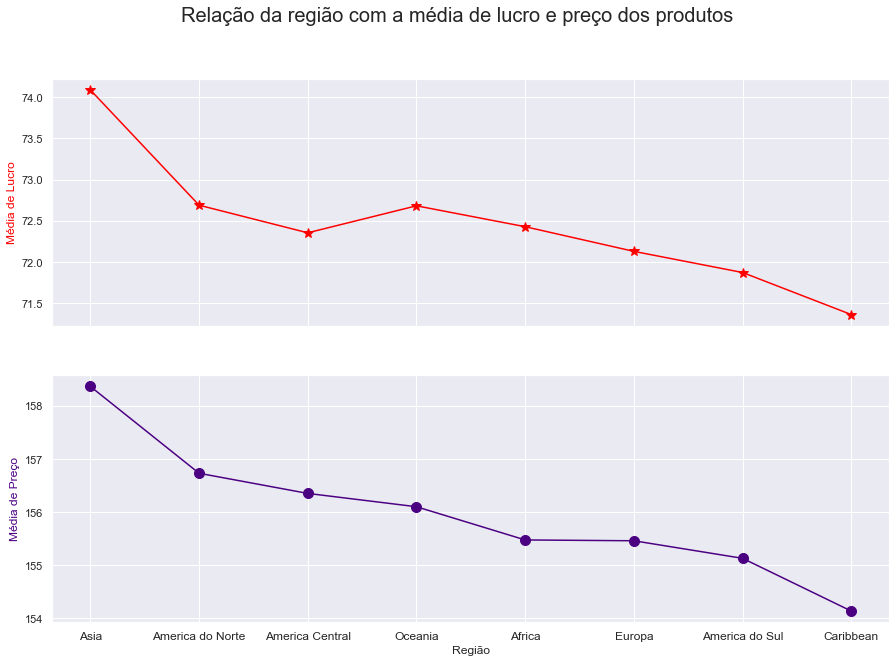

In [248]:
fig, ax1 = plt.subplots(2,figsize=(15,10),sharex=True)

regiao = [reg for reg in reg_prod['Region'].values]

ax1[0].plot(regiao,reg_prod['Lucro($)'],color='red',marker='*',linestyle='-',markersize=10)
ax1[1].plot(regiao,reg_prod['Preço($)'],color='indigo',marker='o',markersize=10)
ax1[1].set_xticklabels(regiao,size=12)
fig.suptitle("Relação da região com a média de lucro e preço dos produtos",fontsize=20)
ax1[1].set_xlabel('Região')
ax1[1].set_ylabel('Média de Preço', color='indigo')
ax1[0].set_ylabel('Média de Lucro', color='red')

plt.show()

## Correlações

1 - Qual é a correlação das variáveis numéricas do dataframe?

In [227]:
pc = sales[['Preço($)','Lucro($)','Discount','Frete($)','Aging']].corr(method ='pearson')
pc

,Preço($),Lucro($),Discount,Frete($),Aging
Preço($),1.000000,0.921523,-0.007277,0.921270,0.017151
Lucro($),0.921523,1.000000,-0.119067,0.999982,0.017747
Discount,-0.007277,-0.119067,1.000000,-0.119380,0.000230
Frete($),0.921270,0.999982,-0.119380,1.000000,0.017669
Aging,0.017151,0.017747,0.000230,0.017669,1.000000


C:\Users\Eduarda\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Eduarda\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


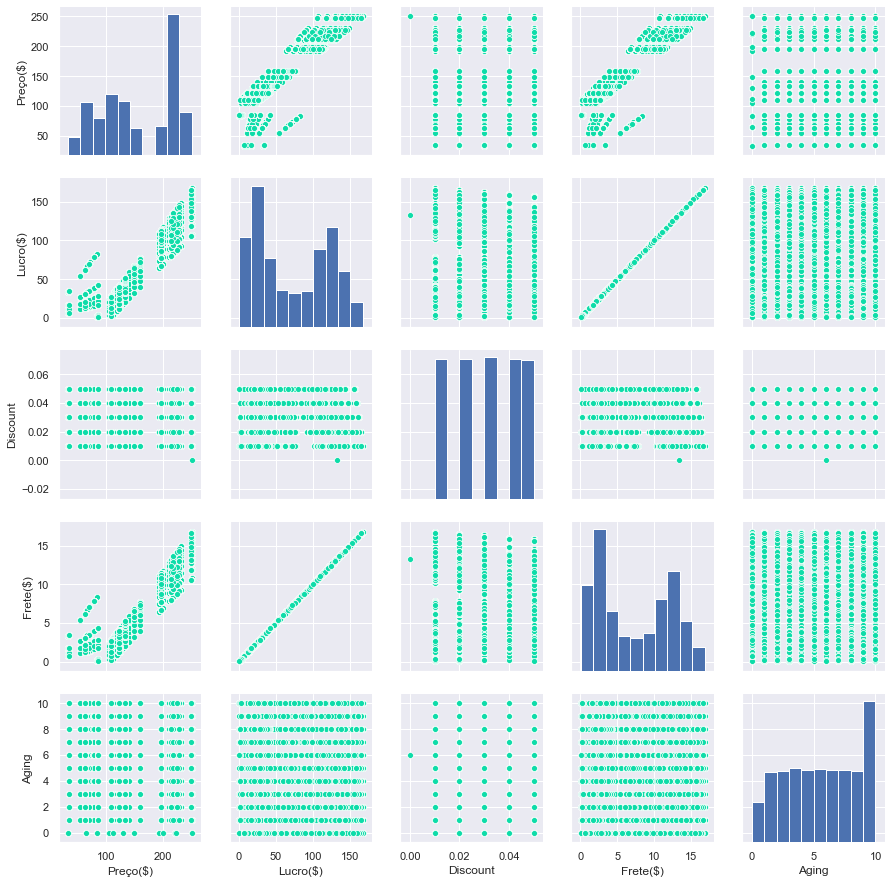

In [59]:
# Pairplot
sns.pairplot(sales[['Preço($)','Lucro($)','Discount','Frete($)','Aging']] , plot_kws={'color':'#0EDCA9'})

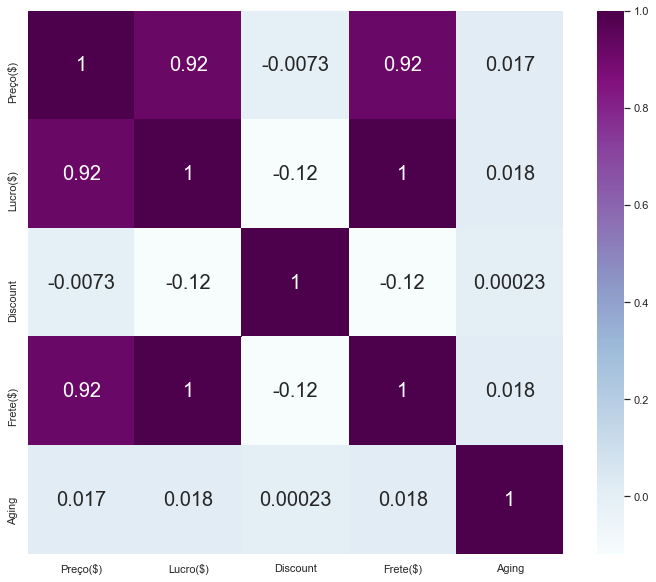

In [228]:
# Mapa de calor
ax = sns.heatmap(pc , annot=True,
                 annot_kws={'size': 20},
                 cmap="BuPu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

2 - Visualizando o joinplot entre as variáveis de preço e lucro

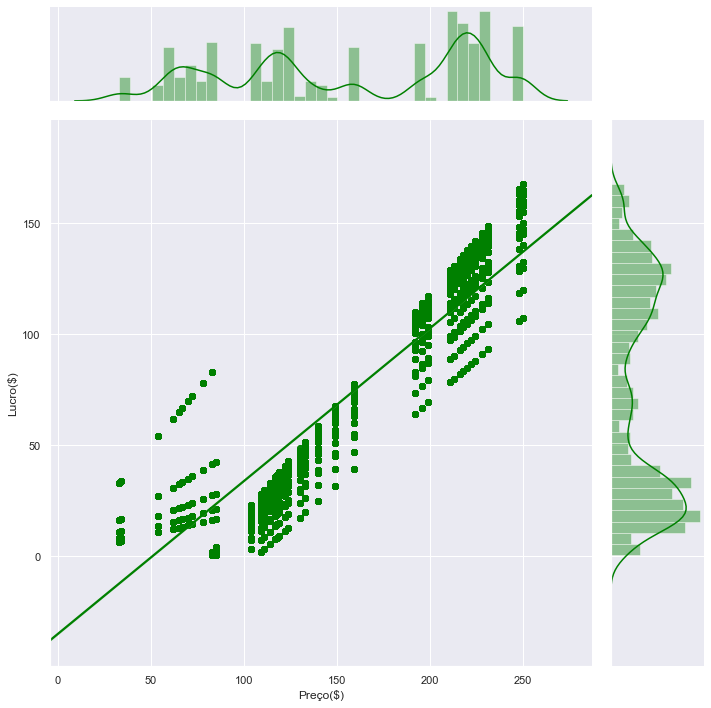

In [61]:
# Jointplot
g = sns.jointplot("Preço($)", "Lucro($)", data=sales, kind="reg", color = 'green', height = 10)

# Análise de Regressão Linear

In [229]:
df_teste = sales[['Preço($)','Lucro($)']]
df_teste

,Preço($),Lucro($)
0,140.0,46.0
1,211.0,112.0
2,117.0,31.2
3,118.0,26.2
4,250.0,160.0
...,...,...
51285,85.0,17.0
51286,85.0,2.5
51287,85.0,0.8
51288,85.0,28.3


In [236]:
# Variável x (feature) / Variável y (label)
X = df_teste['Preço($)'].values
y = df_teste['Lucro($)'].values

In [238]:
# Escolhendo as variáveis de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41028,)
(10257,)
(41028,)
(10257,)


In [246]:
# Construindo o modelo
modelo =  linear_model.LinearRegression()

# Treinando o modelo
#modelo.fit(X_train, y_train)

# 
#y_pred = modelo.predict(X_train)